# Projeto 2 - Ciência dos Dados
- *Objetivo:* Prever uma variável principal em função de demais outras
variáveis que podem influenciar em seu comportamento.
- *Projeto feito por:* Beatriz Borges Zackiewicz, Cameron Swan, Felipe Fuchs, Renato Passarelli

### Bibliotecas e Diretório de Trabalho
---

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\bebec\OneDrive\Área de Trabalho\INSPER\CDADOS\CD22-2\Projeto2\22-2a-cd-p2-grupo_bexcamrefe


---
## Introdução
A época do mês de Janeiro é muito movimentada de fluxo de pessoas em todos os países, devido as festas de fim de ano e período de férias. Assim, o fluxo de voos em aeroportos é aumentado, uma vez que aviões são um dos principais meios de transportes nesse período. Nos Estados Unidos não poderia ser diferente. 
Nosso objetivo com esse estudo é de prever: um voo americano período de Janeiro será cancelado ou não? 

### O Dataset
Para esse estudo, utilizamos um dataset com as principais informações sobre voos nos aeroportos americanos de janeiro de 2019 e 2020.
- *Dataset File:* "Jan_2019_ontime.csv" e "Jan_2020_ontime.csv"
- *Dataset Author:* DIVYANSH AGRAWAL
- *Link para o Dataset:* https://www.kaggle.com/datasets/divyansh22/flight-delay-prediction

#### Informações do Dataset
- **`DAY_OF_MONTH:`** Dia do Mês de Janeiro do voo
- **`DAY_OF_WEEK:`** Dia da semana de Janeiro no voo
- **`OP_UNIQUE_CARRIER:`** Código único da companhia aérea (usado para a suas coligadas)
- ir fazendo isso para todas as colunas do Dataset original....
---


## Nosso Target e Features

Prever: Se um voo americano em Janeiro vai ser cancelado ou não.

**`Target:`** Cancelado ou não --> coluna CANCELLED do dataset

**`Features:`** 
- Cia Aérea (OP_CARRIER)
- Origem (ORIGIN) 
- Destino (DEST)
- Atrasado (DEP_DEL15)
- Distância (DISTANCE)


---
## Modelo e Técnicas de Predição
No nosso estudo usamos: 
- Teste Qui-Quadrado de Pearson
- Regressão Logística

---
## Importando o DataSet
Importando e Juntando os Datasets dos dois anos em um só, filtrando apenas as features e o target de interesse para o estudo

In [76]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2019['Ano'] = 2019
Novos_dados_2019.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,9E,GNV,ATL,0.0,300.0,2019
1,9E,MSP,CVG,0.0,596.0,2019
2,9E,DTW,CVG,0.0,229.0,2019
3,9E,TLH,ATL,0.0,223.0,2019
4,9E,ATL,FSM,0.0,579.0,2019


In [77]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2020['Ano'] = 2020
Novos_dados_2020.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,EV,ORD,GRB,0.0,174.0,2020
1,EV,TUL,ORD,0.0,585.0,2020
2,EV,EWR,TYS,0.0,631.0,2020
3,EV,BTR,IAH,0.0,253.0,2020
4,EV,RIC,IAH,0.0,1157.0,2020


In [78]:
General_base  = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

General_base ['OP_CARRIER'] = General_base ['OP_CARRIER'].astype('category')
General_base ['ORIGIN'] = General_base ['ORIGIN'].astype('category')
General_base ['DEST'] = General_base ['DEST'].astype('category')
General_base ['CANCELLED'] = General_base ['CANCELLED'].astype('category')



In [79]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [80]:
General_base ['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']


In [81]:
Dados_gerais_00 = General_base 
Dados_gerais_00

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
1,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
2,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
3,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
4,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
...,...,...,...,...,...,...
1191326,United Airlines Cargo,IAH,DTW,0.0,1075.0,2019
1191327,United Airlines Cargo,CVG,ORD,1.0,264.0,2019
1191328,United Airlines Cargo,PSP,ORD,1.0,1652.0,2019
1191329,United Airlines Cargo,ORD,PSP,1.0,1652.0,2019


### Fracionando o Dataset
Uma vez que o nosso Dataset final (unindo 2019 e 2020) possui mais de 1 milhão de voos, precisamos fracionar aleatóriamente ele para podermos rodar todas as iterações necessárias sem quebrar o programa. 

Fracionamos o DataSet em 10%

Além disso também precisamos eliminar os valores nulos do Dataset para não atrapalhar na análise. 

In [82]:
Dados_gerais_00 = General_base 
Dados_gerais = Dados_gerais_00.sample(frac = 0.01)
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)


In [83]:
Dados_gerais.dropna()

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
3967,Atlatic Southeast Airlines,EWR,RIC,0.0,277.0,2020
1071928,Delta Air Lines,DTW,SFO,0.0,2079.0,2019
358511,Southwest Airlines,SJC,HNL,0.0,2417.0,2020
272072,Delta Air Lines,ECP,ATL,0.0,240.0,2020
611332,Endeavor,BWI,JFK,0.0,184.0,2019
...,...,...,...,...,...,...
741160,Spirit Airlines,DFW,DEN,0.0,641.0,2019
8974,Southwest Airlines,ALB,MDW,0.0,717.0,2020
1103546,Delta Air Lines,MSP,BZN,0.0,874.0,2019
477268,United Airlines Cargo,IAH,LAX,0.0,1379.0,2020


In [84]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]

print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
225
OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
11688


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,11688.0,797.426,586.405,31.0,364.0,641.0,1050.0,5095.0
1.0,225.0,620.173,411.545,77.0,296.0,506.0,852.0,2601.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
True,225.0,620.173,411.545,77.0,296.0,506.0,852.0,2601.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
False,11688.0,797.426,586.405,31.0,364.0,641.0,1050.0,5095.0


Text(0, 0.5, 'Frequência absoluta')

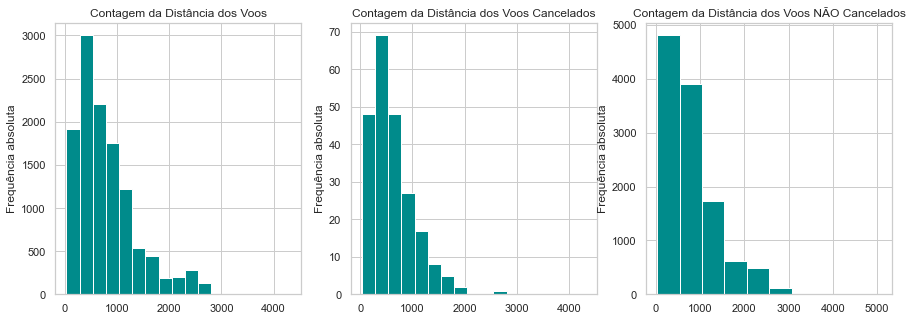

In [85]:
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
display(Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3))
display(Cancelados.groupby(by= [Cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))
display(Nao_cancelados.groupby(by= [Nao_cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))

amplitude = Dados_gerais.DISTANCE.max()-Dados_gerais.DISTANCE.min()
amplitude_faixa= amplitude/ 10
faixa= np.arange(30, 5100.0, amplitude_faixa )

amplitude_cancelados = Cancelados.DISTANCE.max()-Cancelados.DISTANCE.min()
amplitude_faixa_cancelados = amplitude_cancelados / 10
faixa_canc = np.arange(30, 4480.0, amplitude_faixa_cancelados )

amplitude_nao_cancelados = Nao_cancelados.DISTANCE.max()-Nao_cancelados.DISTANCE.min()
amplitude_faixa_nao_cancelados = amplitude_nao_cancelados / 10
faixa_nao_canc = np.arange(30, 5100.0, amplitude_faixa_nao_cancelados )


plt.figure(figsize=(15, 5))
# GRÁFICO DA DISTÂNCIA POR VOO
plt.subplot(131)
plt.hist(Dados_gerais.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos')
plt.ylabel('Frequência absoluta')
# GRÁFICO CANCELADOS
plt.subplot(132)
plt.hist(Cancelados.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos Cancelados')
plt.ylabel('Frequência absoluta')
# GRÁFICO NÃO CANCELADOS
plt.subplot(133)
plt.hist(Nao_cancelados.DISTANCE, bins=faixa_nao_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos NÃO Cancelados')
plt.ylabel('Frequência absoluta')



CANCELLED,0.0,1.0
OP_CARRIER,,
Endeavor,98.9,1.1
American Airlines Cargo,98.7,1.3
Alaska Airlines,98.2,1.8
JetBlue,98.2,1.8
Delta Air Lines,99.7,0.3
Atlatic Southeast Airlines,94.5,5.5
Frontier Flight,98.4,1.6
Allegiant Air,100.0,0.0
Hawaiian Airlines,100.0,0.0


None


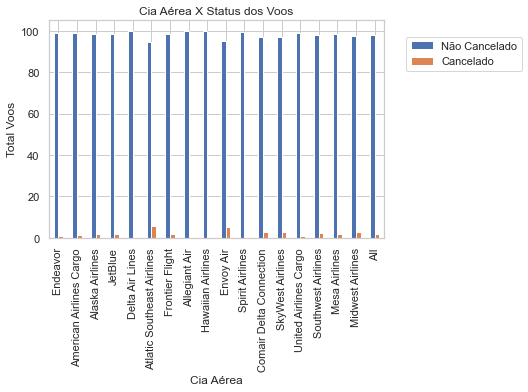

CANCELLED,0.0,1.0
DEST,,
ABE,83.3,16.7
ABI,80.0,20.0
ABQ,100.0,0.0
ABY,100.0,0.0
ACT,100.0,0.0
...,...,...
XNA,94.7,5.3
XWA,100.0,0.0
YAK,100.0,0.0


None


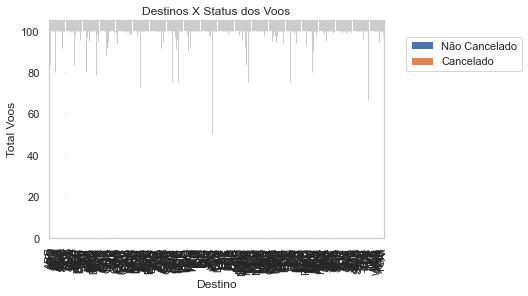

CANCELLED,0.0,1.0
ORIGIN,,
ABE,100.0,0.0
ABI,100.0,0.0
ABQ,97.1,2.9
ABY,100.0,0.0
ACT,100.0,0.0
...,...,...
XNA,100.0,0.0
XWA,100.0,0.0
YAK,100.0,0.0


None


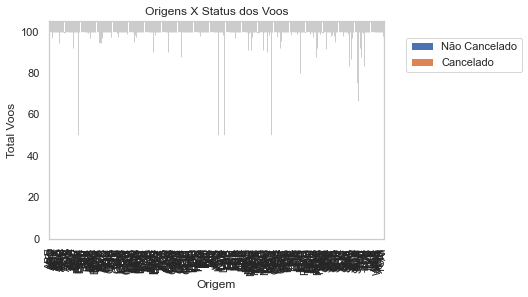

In [86]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'],Dados_gerais['CANCELLED'], normalize='index', margins=True).round(3)*100
#cia_canc__ordenado = cia_canc.sort_values(by=0.0)
print(display(cia_canc))
cia_canc.plot.bar()
plt.title('Cia Aérea X Status dos Voos')
plt.ylabel('Total Voos')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(['Não Cancelado', 'Cancelado'],bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
#dest_canc_ordenado = dest_canc.sort_values(0.0)
print(display(dest_canc))
dest_canc.plot.bar()
plt.title('Destinos X Status dos Voos')
plt.ylabel('Total Voos')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(['Não Cancelado', 'Cancelado'],bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
#org_canc_ordenado = org_canc.sort_values(0.0)
print(display(org_canc))
org_canc.plot.bar()
plt.title('Origens X Status dos Voos')
plt.ylabel('Total Voos')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(['Não Cancelado', 'Cancelado'],bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()



### Aplicando o Teste Qui-Quadrado de Pearson 
Apesar de plotados os gráficos de relação entre o Target e cada feature, não conseguimos observar alguma relação clara, uma vez que nas features de Origens e Destino, temos muitas classificações, fazendo com que a visualização do gráfico não fique tão clara. 

**`O Método:`** o Método do Teste Qui-Quadrado de Pearson é um teste que valida a dependência entre variáveis Categóricas, possuindo o objetivo final de verificar se duas variáveis são dependentes ou não entre sí. 
Ele consiste em estabeler uma Hipótese Nula (H0) = Não há dependência entre as variáveis, e para verificar essa hípose ele usa ou o valor-p ou o valor Qui-Quadrado.
Aqui escolhemos analisar pelo valor-p, uma vez que já estudamos ele no curso.

**`Aplicação:`**  
O valor-p é a probabilidade de ter uma diferença entre as variáveis maior do que a que se foi observada para a H0.
Estabelecemos um valor de signifiância (alfa) = 5%, ou seja, ele descreve a probabilidade de rejeitar H0 erroneamente quando for verdadeiro. Assim, se o valor-p for maior do que o alfa, devemos aceitar H0, concluindo pela independência entre as duas variáveis. 

In [87]:
# TESTE QUI-QUADRADO DE PEARSON - teste de independência entre variáveis ​​categóricas
# adotando alfa de significancia = 5% (0.05)
from scipy.stats import chi2_contingency
alpha = 0.05

# Dependendia do status do voo X CIA AREA 
stat, pcia, dof, expected = chi2_contingency(cia_canc)
print("valor-p cia aérea é " + str(pcia))
if pcia <= alpha:
    print('Cancelamento e CIA aérea são DEPENDENTES')
else:
    print('Cancelamento e CIA aérea são INDEPENDENTES')

# Dependendia do status do voo X DESTINO
stat, pdest, dof, expected = chi2_contingency(dest_canc)
print("valor-p do Destino é "  + str(pdest))
if pdest <= alpha:
    print('Cancelamento e Destino são DEPENDENTES')
else:
    print('Cancelamento e Destino são INDEPENDENTES')

# Dependendia do status do voo X ORIGEM
stat, porg, dof, expected = chi2_contingency(org_canc)
print("valor-p da Origem é "  + str(porg))
if porg <= alpha:
    print('Cancelamento e Origem são DEPENDENTES')
else:
    print('Cancelamento Origem são INDEPENDENTES')

valor-p cia aérea é 0.23668371190623652
Cancelamento e CIA aérea são INDEPENDENTES
valor-p do Destino é 0.0
Cancelamento e Destino são DEPENDENTES
valor-p da Origem é 0.0
Cancelamento e Origem são DEPENDENTES


## Aplicando a Correlação nas variáveis quantitativas
A Feature Distância é a nossa única variável quantitativa dentro da nossa análise e por isso é a única sobre a qual podemos aplicar o índice de correlação.


In [107]:
corr_canc_dist = Dados_gerais['CANCELLED'].corr(Dados_gerais['DISTANCE'])
print(f'A correlação entre o Cancelamento de Voos e Distância do voo = {corr_canc_dist}')

A correlação entre o Cancelamento de Voos e Distância do voo = -0.04115884176975054


MONTANDO O MODELO PREDITIVO
- aqui sim temos que dividir em uma parte de treinamento

In [88]:
Dados_gerais_00 = Dados_gerais 
Dados_gerais = Dados_gerais_00.sample(frac = 0.1)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)

In [89]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dados_gerais = Dados_gerais.dropna()
Dados_gerais.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
920009,Alaska Airlines,ANC,PHX,0.0,2552.0,2019
357833,Southwest Airlines,SJC,AUS,0.0,1476.0,2020
1002861,United Airlines Cargo,IAH,DCA,0.0,1208.0,2019
660252,Envoy Air,GRK,DFW,0.0,134.0,2019
418217,SkyWest Airlines,SEA,EUG,0.0,234.0,2020


In [90]:
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(Dados_gerais[var],prefix = var)
    Dados_gerais = Dados_gerais.join(cat_list)
     
data_vars=Dados_gerais.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [91]:
data_final=Dados_gerais[to_keep]
data_final.columns.values

array(['CANCELLED', 'DISTANCE', 'Ano', 'OP_CARRIER_ Endeavor',
       'OP_CARRIER_American Airlines Cargo', 'OP_CARRIER_Alaska Airlines',
       'OP_CARRIER_JetBlue', 'OP_CARRIER_Delta Air Lines',
       'OP_CARRIER_Atlatic Southeast Airlines',
       'OP_CARRIER_Frontier Flight', 'OP_CARRIER_Allegiant Air',
       'OP_CARRIER_Hawaiian Airlines', 'OP_CARRIER_Envoy Air',
       'OP_CARRIER_Spirit Airlines', 'OP_CARRIER_Comair Delta Connection',
       'OP_CARRIER_SkyWest Airlines', 'OP_CARRIER_United Airlines Cargo',
       'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Mesa Airlines',
       'OP_CARRIER_Midwest Airlines', 'ORIGIN_ABE', 'ORIGIN_ABI',
       'ORIGIN_ABQ', 'ORIGIN_ABR', 'ORIGIN_ABY', 'ORIGIN_ACT',
       'ORIGIN_ACV', 'ORIGIN_ACY', 'ORIGIN_ADK', 'ORIGIN_ADQ',
       'ORIGIN_AEX', 'ORIGIN_AGS', 'ORIGIN_ALB', 'ORIGIN_ALO',
       'ORIGIN_AMA', 'ORIGIN_ANC', 'ORIGIN_APN', 'ORIGIN_ART',
       'ORIGIN_ASE', 'ORIGIN_ATL', 'ORIGIN_ATW', 'ORIGIN_ATY',
       'ORIGIN_AUS', 'ORIGIN_

In [92]:
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
920009,0.0,2552.0,2019,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
357833,0.0,1476.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002861,0.0,1208.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660252,0.0,134.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418217,0.0,234.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159788,1.0,1550.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
346418,0.0,651.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796772,0.0,771.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
787453,0.0,363.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
linhas = len(data_final)
col=726
b=0
while b < col:
    if b<col:
        nome = data_final.columns[b]
        a = 0
        sum = 0
        while a<linhas:
            sum+=data_final.iloc[a,b]
            a+=1
        
        print(nome)
        print(sum)
        if sum < 20 and nome!= "CANCELLED":
            data_final = data_final.drop(nome, axis=1)
            b+=-1
            col+=-1
        b+=1
        
data_sem_zero = data_final

CANCELLED
22.0
DISTANCE
948154.0
Ano
2405224
OP_CARRIER_ Endeavor
51
OP_CARRIER_American Airlines Cargo
138
OP_CARRIER_Alaska Airlines
40
OP_CARRIER_JetBlue
47
OP_CARRIER_Delta Air Lines
152
OP_CARRIER_Atlatic Southeast Airlines
20
OP_CARRIER_Frontier Flight
19
OP_CARRIER_Allegiant Air
13
OP_CARRIER_Hawaiian Airlines
10
OP_CARRIER_Envoy Air
59
OP_CARRIER_Spirit Airlines
32
OP_CARRIER_Comair Delta Connection
42
OP_CARRIER_SkyWest Airlines
135
OP_CARRIER_United Airlines Cargo
109
OP_CARRIER_Southwest Airlines
238
OP_CARRIER_Mesa Airlines
27
OP_CARRIER_Midwest Airlines
59
ORIGIN_ABE
1
ORIGIN_ABI
0
ORIGIN_ABQ
2
ORIGIN_ABR
0
ORIGIN_ABY
0
ORIGIN_ACT
0
ORIGIN_ACV
0
ORIGIN_ACY
0
ORIGIN_ADK
0
ORIGIN_ADQ
0
ORIGIN_AEX
0
ORIGIN_AGS
0
ORIGIN_ALB
2
ORIGIN_ALO
0
ORIGIN_AMA
0
ORIGIN_ANC
3
ORIGIN_APN
0
ORIGIN_ART
0
ORIGIN_ASE
0
ORIGIN_ATL
69
ORIGIN_ATW
0
ORIGIN_ATY
0
ORIGIN_AUS
15
ORIGIN_AVL
0
ORIGIN_AVP
2
ORIGIN_AZA
3
ORIGIN_AZO
3
ORIGIN_BDL
3
ORIGIN_BET
0
ORIGIN_BFF
0
ORIGIN_BFL
0
ORIGIN_BFM
0
ORIGIN

In [94]:
data_final=data_sem_zero
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Envoy Air,...,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_PHL,DEST_PHX,DEST_RDU,DEST_SEA,DEST_SFO
920009,0.0,2552.0,2019,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
357833,0.0,1476.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002861,0.0,1208.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660252,0.0,134.0,2019,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
418217,0.0,234.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159788,1.0,1550.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346418,0.0,651.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
796772,0.0,771.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
787453,0.0,363.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
linhas = len(data_final)
col=54
b=0
while b < col:
    if b<col:
        nome = data_final.columns[b]
        a = 0
        sum = 0
        while a<linhas:
            sum+=data_final.iloc[a,b]
            a+=1
        print(sum)
        if sum < 20 and nome!= "CANCELLED":
            data_final = data_final.drop(nome, axis=1)
            b+=-1
            col+=-1
        b+=1
        

22.0
948154.0
2405224
51
138
40
47
152
20
59
32
42
135
109
238
27
59
69
20
40
25
44
49
22
25
33
24
32
28
27
28
24
50
23
25
64
21
20
36
23
50
40
26
34
34
49
27
25
30
45
20
22
21
21


In [96]:
X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:, data_final.columns == 'CANCELLED']

In [97]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['CANCELLED'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['CANCELLED']==0]))
print("Number of subscription",len(os_data_y[os_data_y['CANCELLED']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==1])/len(os_data_X))

length of oversampled data is  1626
Number of no subscription in oversampled data 813
Number of subscription 813
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [98]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True False  True False False False
  True False  True False False False False False False False  True False
 False  True  True  True  True False  True  True  True False False False
 False  True False False False False]
[3 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1 3 1 2 3 3 1 3 1 3 2 2 3 3 3 3 1 3 3
 1 1 1 1 3 1 1 1 3 3 2 2 1 3 3 3 2]


In [99]:
Name_list=[]
for i in range(len(rfe.support_)):
    teste = rfe.support_[i]
    nome = data_final.columns[i]
    if teste == True:
        Name_list.append(nome)
X=os_data_X[Name_list]
y=os_data_y['CANCELLED']

In [100]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.198119
         Iterations: 35
         Function evaluations: 51
         Gradient evaluations: 51
                                    Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.714   
Dependent Variable:         CANCELLED                AIC:                      698.2826
Date:                       2022-11-28 14:52         BIC:                      843.9173
No. Observations:           1626                     Log-Likelihood:           -322.14 
Df Model:                   26                       LL-Null:                  -1127.1 
Df Residuals:               1599                     LLR p-value:              0.0000  
Converged:                  0.0000                   Scale:                    1.0000  
---------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------

c:\Users\bebec\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
certos=confusion_matrix[0][0]+confusion_matrix[1][1]
errados=confusion_matrix[0][1]+confusion_matrix[1][0]
print(confusion_matrix)

print(f'Temos {certos} predições certas')
print(f'Temos {errados} predições erradas')

[[224  23]
 [ 11 230]]
Temos 454 predições certas
Temos 34 predições erradas


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       247
         1.0       0.91      0.95      0.93       241

    accuracy                           0.93       488
   macro avg       0.93      0.93      0.93       488
weighted avg       0.93      0.93      0.93       488



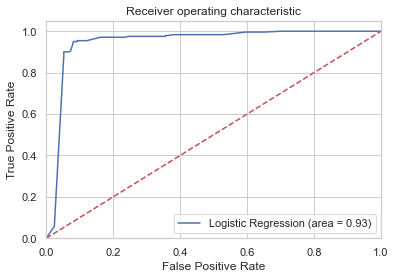

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

MODELO DE PREDIÇÃO - RESULTADOS

---
# Referências 

- https://acervolima.com/python-teste-qui-quadrado-de-pearson/